In [1]:
import numpy as numpy
import pandas as pd

In [2]:
df = pd.read_csv('../data-sets/apple_quality.csv')
df.set_index('A_id', inplace=True)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [3]:
df['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [4]:
mapValue = {'good': 1, 'bad': 0}
df['Quality'] = df['Quality'].map(mapValue)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(['Quality'], axis=1)
y =df['Quality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(2800, 7) (1200, 7) (2800,) (1200,)


       Feature  Importance
5     Ripeness    0.215795
2    Sweetness    0.181324
6      Acidity    0.150782
0         Size    0.143685
4    Juiciness    0.124596
1       Weight    0.100137
3  Crunchiness    0.083681


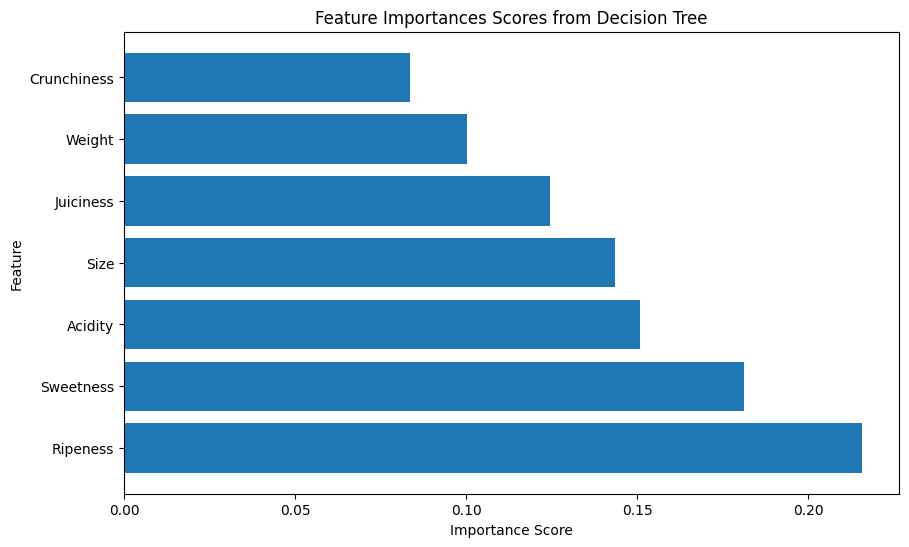

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

#Get features importances from the trained classifier
feature_importances = model.feature_importances_

#Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature' : X.columns, 'Importance': feature_importances})
feature_importances_df.sort_values('Importance', ascending=False, inplace=True)

print(feature_importances_df)


#plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances Scores from Decision Tree')
plt.show()

In [16]:
selected_features = feature_importances_df[feature_importances_df['Importance'] > 0.10]['Feature'].tolist()

print("Selected Featre with importance score > 0.10")
print(selected_features)

Selected Featre with importance score > 0.10
['Ripeness', 'Sweetness', 'Acidity', 'Size', 'Juiciness', 'Weight']


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Use only the Seelcted features for logisistc regression
X_train_selected = x_train[selected_features]
X_test_selected = x_test[selected_features]

#Create a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)
# print(y_test)

y_pred = logreg.predict(X_test_selected)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score with logisitic regression with selected features : {acc}')

Accuracy Score with logisitic regression with selected features : 0.7533333333333333


In [15]:
logregwithfea = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7533333333333333
